# Analisi univariata e bivariata


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder



In [ ]:
df=pd.read_csv('../docs/csv/csvscenarioJunctionExo.csv',index_col=0)

In [ ]:
c=df.select_dtypes(include='object').columns.tolist()


In [ ]:
le_df=df
le = preprocessing.LabelEncoder()
le_df[c] = df[c].apply(lambda col: le.fit_transform(col))

In [ ]:
x=le_df.columns
y=le_df['win']

In [ ]:
for i in x:
    sns.FacetGrid(le_df,hue='win',size=5).map(sns.distplot,i).add_legend()

In [ ]:
for i in range(len(x)):
    plt.figure()
    plt.plot(df[x[i]],y)
    # Show/save figure as desired.
    plt.show()

In [ ]:
x=le_df.columns
y=le_df['win']
for i in range(len(x)):
    plt.scatter(df.index,df[x[i]])
    plt.show()

In [ ]:
x=le_df.columns
y=le_df['win']
for i in range(len(x)):
    plt.hist(le_df[x[i]])
    plt.show()

In [ ]:
df['stat-name_red_Tank1'].value_counts().plot.bar()


In [ ]:
df['hp_red_Tank1'].value_counts().sort_index().plot.line()

In [ ]:

df['hp_red_Tank1'].plot.hist()

In [ ]:
le_df.plot.scatter(x='move_red_Tank1', y='win')

In [ ]:
for i in range(len(x)):
    sns.boxplot(x=x[i],y='win',data=le_df)
    plt.show()

# Analisi game


In [1]:
from agents.matchmanager import MatchManager

from itertools import product

from agents import GreedyAgent, AlphaBetaAgent, RandomAgent
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
from agents.ml.simple import SimpleMLAgent
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
agents = ['RandomAgent','SimpleML','GreedyAgent']
scenarios = ['Test1v1', 'Test2v2', 'Junction']

In [3]:
all_json=[]
for i in range(0, 100):
    for s in scenarios:
        for agentRed, agentBlue in product(agents, agents):
            file_name=f'output/{agentRed}_{agentBlue}_{s}_{i}.json'
            data=json.load(open(file_name))
            all_json.append(data)            

In [4]:
iniziale=pd.DataFrame(all_json)

In [5]:
df=pd.DataFrame(all_json)

In [6]:
df.loc[(((df.teamRed == "SimpleML") & (df.winner=="red")) | ((df.teamBlue == "SimpleML") & (df.winner=="blue"))), "winner"] = "SimpleML"
df.loc[(((df.teamRed == "RandomAgent") & (df.winner=="red")) | ((df.teamBlue == "RandomAgent") & (df.winner=="blue"))), "winner"] = "RandomAgent"
df.loc[(((df.teamRed == "GreedyAgent") & (df.winner=="red")) | ((df.teamBlue == "GreedyAgent") & (df.winner=="blue"))), "winner"] = "GreedyAgent"


[]

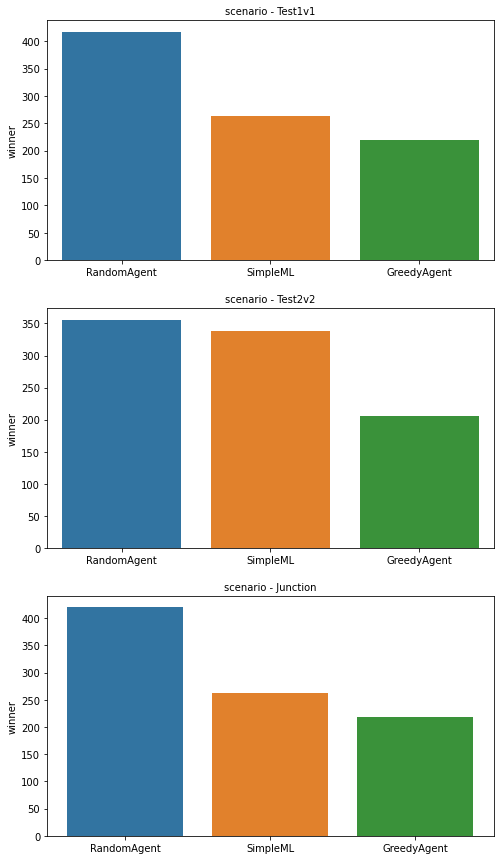

In [7]:
departments=df['scenario'].unique()
fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    sns.barplot(y=df[(df.scenario == name)]['winner'].value_counts(),x=df['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
plt.plot()  

#pensa a sistemarli con percntuali ecc

Percentuale vincita SimpleML: 0.30333333333333334
Percentuale vincita RandomAgent: 0.2548148148148148
Percentuale vincita GreedyAgent: 0.44185185185185183


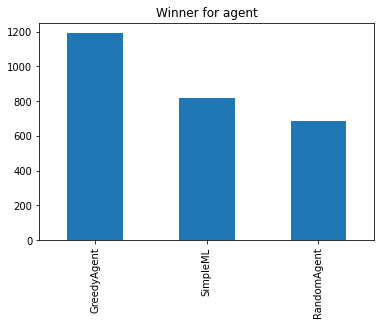

In [8]:
df['winner'].value_counts().plot.bar(title='Winner for agent')
print('Percentuale vincita SimpleML:',len(df[df['winner']=="SimpleML"])/len(df))
print('Percentuale vincita RandomAgent:',len(df[df['winner']=="RandomAgent"])/len(df))
print('Percentuale vincita GreedyAgent:',len(df[df['winner']=="GreedyAgent"])/len(df))

<AxesSubplot:title={'center':'Winner for agent simpleML vs simpleML'}>

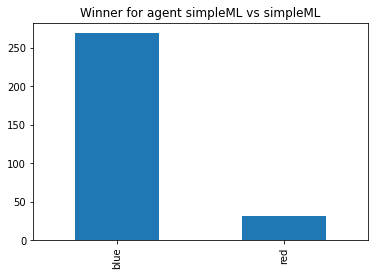

In [9]:
mask=iniziale.loc[(((iniziale.teamRed == "SimpleML") & (iniziale.teamBlue == "SimpleML")))]
mask['winner'].value_counts().plot.bar(title='Winner for agent simpleML vs simpleML')


Percentuale vincita SimpleML su RandomAgent: 0.6183333333333333
Percentuale vincita SimpleML su Random su scenario: Test1v1 0.595
Percentuale vincita SimpleML su Random su scenario: Test2v2 0.695
Percentuale vincita SimpleML su Random su scenario: Junction 0.565


[]

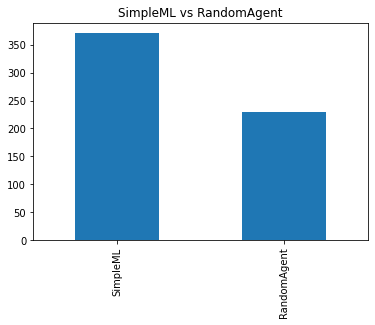

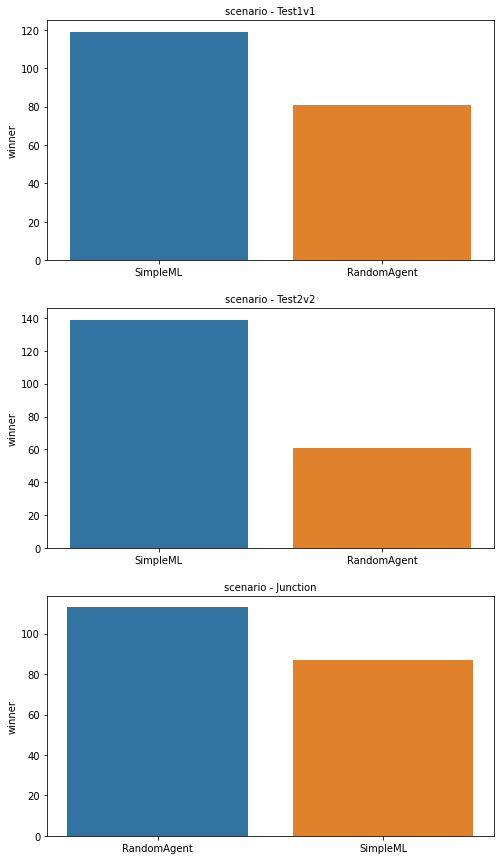

In [10]:
mask=df.loc[((df.teamRed == "SimpleML") & (df.teamBlue == "RandomAgent"))|((df.teamRed == "RandomAgent") & (df.teamBlue == "SimpleML"))]
mask['winner'].value_counts().plot.bar(title='SimpleML vs RandomAgent')
print('Percentuale vincita SimpleML su RandomAgent:',len(mask[mask['winner']=="SimpleML"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML su Random su scenario:',name,len(dd[dd['winner']=="SimpleML"])/len(dd))

plt.plot() 
#metti perncetuale per ogni scenario

Percentuale vincita SimpleML su GreedyAgent: 0.24666666666666667
Percentuale vincita SimpleML su Greedy su scenario: Test1v1 0.0
Percentuale vincita SimpleML su Greedy su scenario: Test2v2 0.495
Percentuale vincita SimpleML su Greedy su scenario: Junction 0.245


[]

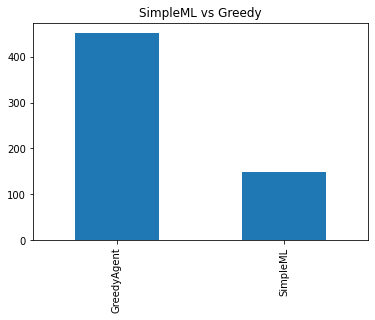

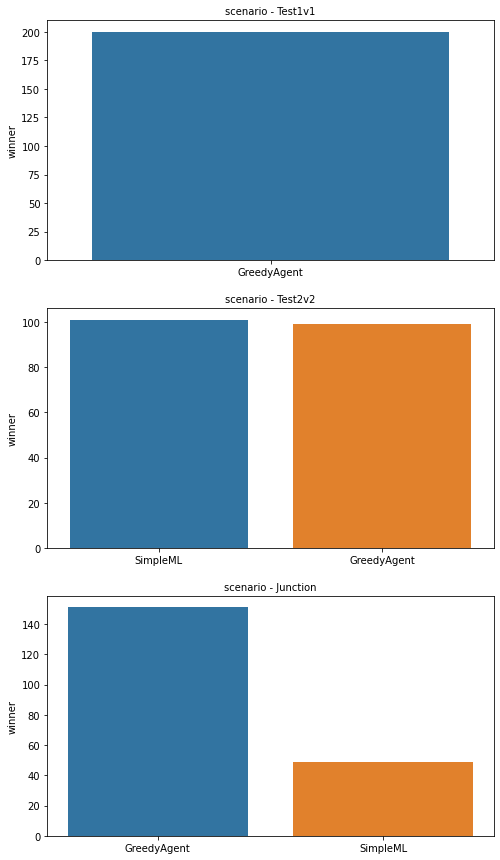

In [12]:
mask=df.loc[((df.teamRed == "GreedyAgent") & (df.teamBlue == "SimpleML")) | ((df.teamRed == "SimpleML") & (df.teamBlue == "GreedyAgent"))]
mask['winner'].value_counts().plot.bar(title='SimpleML vs Greedy')
print('Percentuale vincita SimpleML su GreedyAgent:',len(mask[mask['winner']=="SimpleML"])/len(mask))
#departments=['Junction','Test2v2']
departments=mask['scenario'].unique()
fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML su Greedy su scenario:',name,len(dd[dd['winner']=="SimpleML"])/len(dd))

plt.plot() 

In [ ]:
#analisi per colore-> quando è rosso e quando è blu contro random e greedy! metti bene le percentuali
#spiega un attimo logica dell'agente per Antonucci

Percentuale vincita SimpleML Red su RandomAgent Blue: 0.37666666666666665
Percentuale vincita SimpleML Red su Random Blue su scenario: Test1v1 0.42
Percentuale vincita SimpleML Red su Random Blue su scenario: Test2v2 0.54
Percentuale vincita SimpleML Red su Random Blue su scenario: Junction 0.17


[]

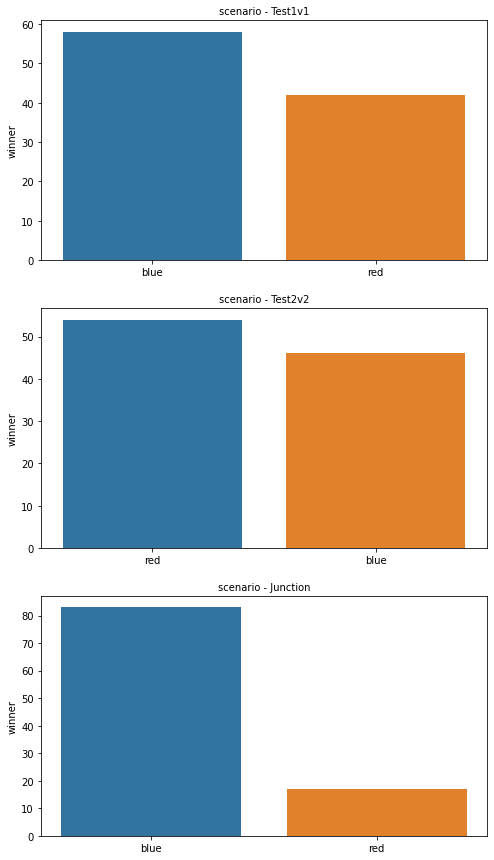

In [16]:
mask=iniziale.loc[((iniziale.teamRed == "SimpleML") & (iniziale.teamBlue == "RandomAgent"))]
print('Percentuale vincita SimpleML Red su RandomAgent Blue:',len(mask[mask['winner']=="red"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML Red su Random Blue su scenario:',name,len(dd[dd['winner']=="red"])/len(dd))

plt.plot() 
#metti perncetuale per ogni scenario

Percentuale vincita SimpleML Blue su RandomAgent Red: 0.86
Percentuale vincita SimpleML Blue su Random Red su scenario: Test1v1 0.77
Percentuale vincita SimpleML Blue su Random Red su scenario: Test2v2 0.85
Percentuale vincita SimpleML Blue su Random Red su scenario: Junction 0.96


[]

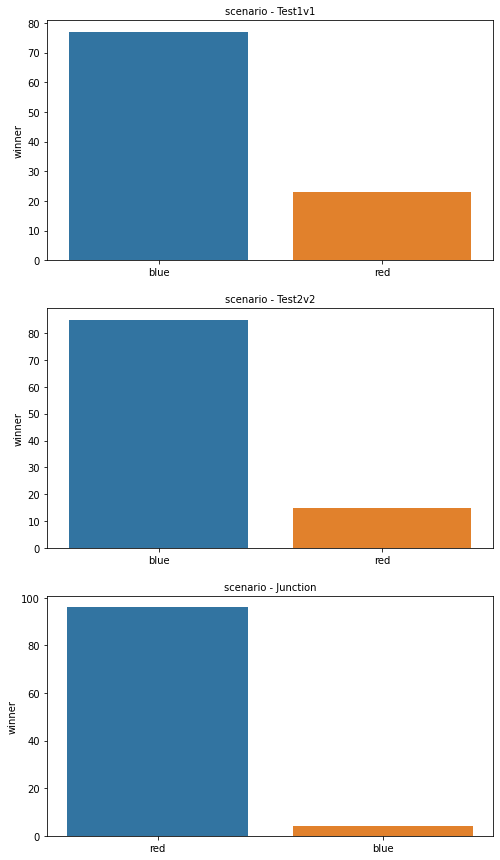

In [18]:
mask=iniziale.loc[((iniziale.teamRed == "RandomAgent") & (iniziale.teamBlue == "SimpleML"))]
print('Percentuale vincita SimpleML Blue su RandomAgent Red:',len(mask[mask['winner']=="blue"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML Blue su Random Red su scenario:',name,len(dd[dd['winner']=="blue"])/len(dd))

plt.plot() 
#metti perncetuale per ogni scenario

Percentuale vincita SimpleML Blue su GreedyAgent Red: 0.32666666666666666
Percentuale vincita SimpleML Blue su Greedy Red su scenario: Test1v1 0.0
Percentuale vincita SimpleML Blue su Greedy Red su scenario: Test2v2 0.72
Percentuale vincita SimpleML Blue su Greedy Red su scenario: Junction 0.26


[]

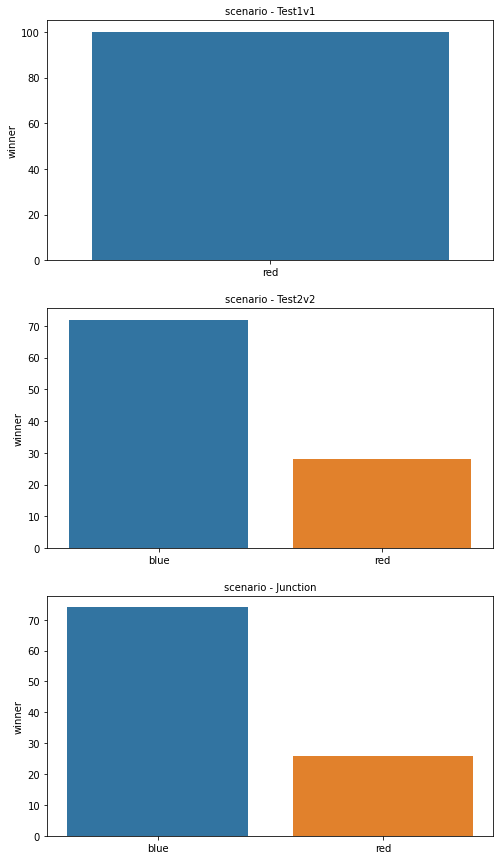

In [20]:
mask=iniziale.loc[((iniziale.teamRed == "GreedyAgent") & (iniziale.teamBlue == "SimpleML"))]
print('Percentuale vincita SimpleML Blue su GreedyAgent Red:',len(mask[mask['winner']=="blue"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML Blue su Greedy Red su scenario:',name,len(dd[dd['winner']=="blue"])/len(dd))

plt.plot() 
#metti perncetuale per ogni scenario

Percentuale vincita SimpleML Red su GreedyAgent Blue: 0.16666666666666666
Percentuale vincita SimpleML Red su Greedy Blue su scenario: Test1v1 0.0
Percentuale vincita SimpleML Red su Greedy Blue su scenario: Test2v2 0.27
Percentuale vincita SimpleML Red su Greedy Blue su scenario: Junction 0.23


[]

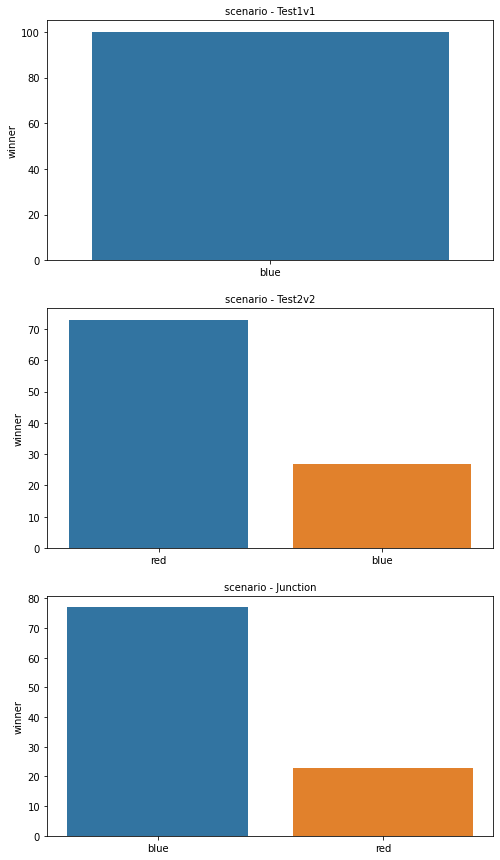

In [21]:
mask=iniziale.loc[((iniziale.teamRed == "SimpleML") & (iniziale.teamBlue == "GreedyAgent"))]
print('Percentuale vincita SimpleML Red su GreedyAgent Blue:',len(mask[mask['winner']=="red"])/len(mask))
departments=mask['scenario'].unique()

fig, ax = plt.subplots(len(departments), figsize=(8,15))
for i,name in enumerate(departments):
    dd=mask[(mask.scenario == name)]
    sns.barplot(y=dd['winner'].value_counts(),x=dd['winner'].unique() ,ax=ax[i])
    ax[i].set_title('scenario - {}'.format(name), fontsize=10)
    print('Percentuale vincita SimpleML Red su Greedy Blue su scenario:',name,len(dd[dd['winner']=="red"])/len(dd))

plt.plot() 
#metti perncetuale per ogni scenario